## Classification with scikit-learn
### Algorithm : Logistic Regression

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# initialize logger
import logging
logging.basicConfig(level = logging.INFO,
                    format = '%(asctime)s - %(levelname)s - %(message)s')

In [2]:
# Read Dataset from file
dataset = pd.read_csv('Social_Network_Ads.csv')
logging.info('Dataset Shape : ' + str(dataset.shape) )

2019-01-15 15:20:57,243 - INFO - Dataset Shape : (400, 5)


In [3]:
dataset.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
areMissingValuesPresent = dataset.isnull().values.any()
if areMissingValuesPresent:
    logging.warning('Missing Values Present in dataset ')

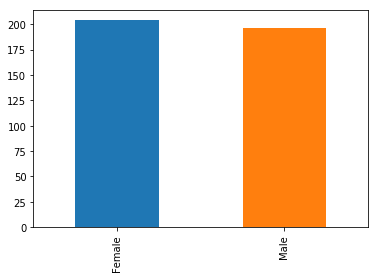

In [5]:
dataset['Gender'].value_counts().sort_index().plot.bar()

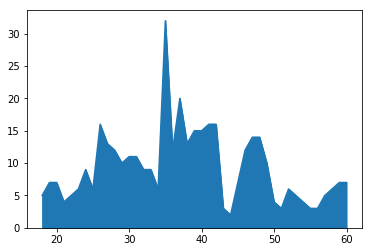

In [6]:
dataset['Age'].value_counts().sort_index().plot.area()

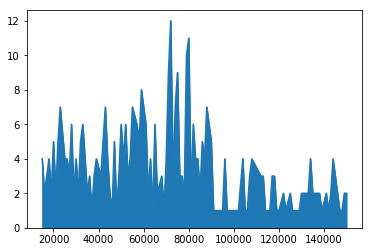

In [7]:
dataset['EstimatedSalary'].value_counts().sort_index().plot.area()

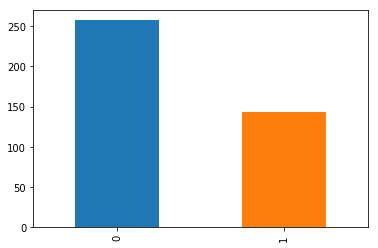

In [8]:
dataset['Purchased'].value_counts().sort_index().plot.bar()

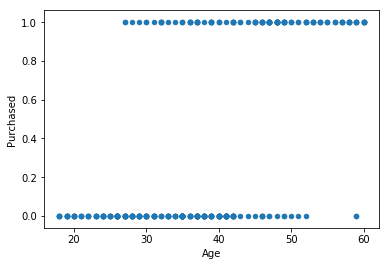

In [9]:
dataset.plot.scatter(x='Age', y='Purchased')

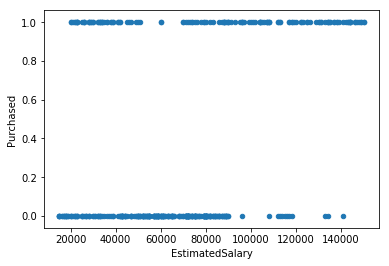

In [10]:
dataset.plot.scatter(x='EstimatedSalary', y='Purchased')

In [11]:
X = dataset.iloc[:, [1,2,3]].values
y = dataset.iloc[:, -1].values

In [12]:
#  HANDLING CATEGORICAL DATA ######################################################################################
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])

In [13]:
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()

# Avoiding the Dummy Variable Trap
X = X[:, 1:]

In [14]:
#  SPLITTING DATASET INTO TRAIN AND TEST SET ######################################################################################
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
#  FEATURE SCALING ######################################################################################
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Classification

In [16]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)

In [17]:
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Prediction

In [18]:
y_pred = classifier.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [20]:
cm

array([[56,  2],
       [ 4, 18]], dtype=int64)

In [21]:
### Prediction with probabilities

In [45]:
y_pred_prob = classifier.predict_proba(X_test)
y_pred_prob[0:5]

array([[0.86316039, 0.13683961],
       [0.83139346, 0.16860654],
       [0.7760826 , 0.2239174 ],
       [0.90435603, 0.09564397],
       [0.89847567, 0.10152433]])

In [46]:
y_pred_prob_class = np.where(y_pred_prob[:,1] > .45, 1, 0)
y_pred_prob_class[0:5]

array([0, 0, 0, 0, 0])

In [47]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[56,  2],
       [ 4, 18]], dtype=int64)